# Linear Regression Of Average Playtime vs Negative/Positive Ratings
## To see the relationship between Average Playtime vs Negative/Positive Ratings
## To predict numbers of ratings if there is more Playtime

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import our input dataset
file_path = Path('./Resources/steamclean.csv')
steamclean_df = pd.read_csv(file_path)
steamclean_df.head()

C:\Users\SC013\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,genre_8,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,average_rating
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63936.5
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.5
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1907.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,770.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2769.0


In [3]:
steamclean_df.columns.tolist()

['appid',
 'name',
 'release_date',
 'english',
 'developer',
 'publisher',
 'platforms',
 'required_age',
 'categories',
 'genres',
 'steamspy_tags',
 'achievements',
 'positive_ratings',
 'negative_ratings',
 'average_playtime',
 'median_playtime',
 'owners',
 'price',
 'genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'genre_5',
 'genre_6',
 'genre_7',
 'genre_8',
 'genre_9',
 'genre_10',
 'genre_11',
 'genre_12',
 'genre_13',
 'genre_14',
 'genre_15',
 'genre_16',
 'average_rating']

In [24]:
# Drop columns:
steam_df = steamclean_df.drop(['genre_1',
 'genre_2',
 'genre_3',
 'genre_4',
 'genre_5',
 'genre_6',
 'genre_7',
 'genre_8',
 'genre_9',
 'genre_10',
 'genre_11',
 'genre_12',
 'genre_13',
 'genre_14',
 'genre_15',
 'genre_16',], axis = 1)
steam_df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,average_rating
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,63936.5
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,1975.5
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,1907.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,770.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,2769.0


In [25]:
steam_df.count()

appid               27161
name                27161
release_date        27161
english             27161
developer           27161
publisher           27161
platforms           27161
required_age        27161
categories          27161
genres              27161
steamspy_tags       27161
achievements        27161
positive_ratings    27161
negative_ratings    27161
average_playtime    27161
median_playtime     27161
owners              27161
price               27161
average_rating      27161
dtype: int64

## average_playtime vs. positive_ratings

In [20]:
# Select average_playtime & negative_ratings
playtime_vs_positive = steamclean_df[['average_playtime', 'positive_ratings']]
playtime_vs_positive.head(5)

,average_playtime,positive_ratings
0,17612,124534
1,277,3318
2,187,3416
3,258,1273
4,624,5250


In [21]:
playtime_vs_positive.count()

average_playtime    27161
positive_ratings    27161
dtype: int64

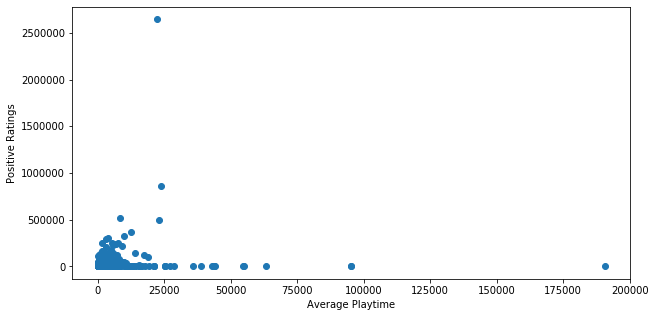

In [23]:
# Visually inspect the relationship between Genre & Global_Sales
plt.scatter(playtime_vs_positive.average_playtime, playtime_vs_positive.positive_ratings)
plt.ylabel('Positive Ratings')
plt.xlabel('Average Playtime')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

## Prepare for Scikit-learn

In [13]:
# Format the data to meet the requirements of the Scikit-learn library
X = playtime_vs_negative.average_playtime.values.reshape(-1, 1)

In [14]:
#  Examine the first five entries in X
X[:5]

array([[17612],
       [  277],
       [  187],
       [  258],
       [  624]], dtype=int64)

In [15]:
X.shape

(27161, 1)

(27161,)


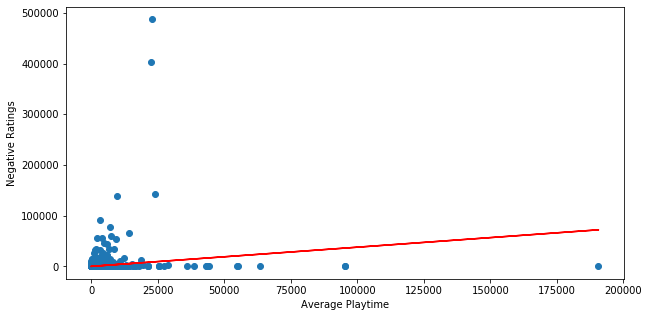

In [16]:
y = playtime_vs_negative.negative_ratings
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.ylabel('Negative Ratings')
plt.xlabel('Average Playtime')
plt.show()

In [17]:
# Examine the specific parameters of our model: the slope and the y-intercept.
# The slope is represented by model.coef_, and model.intercept_ is the y-intercept
print(model.coef_)
print(model.intercept_)

[0.37793505]
153.9811514548361


In [19]:
# The best fit line is in red, drawn through the predictions.
playtime_vs_negative['negative_ratings'].max()

487076